In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology, color, segmentation, feature, filters, io
from sklearn import cluster
import cv2
%matplotlib inline

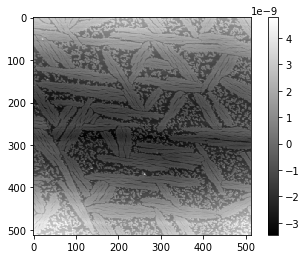

In [2]:
I1 = np.loadtxt('tdj_grbp5_1um_1hr_3rd_020717.001.txt')
#plt.gray()
plt.imshow(I1, cmap = 'gray', interpolation = 'nearest')
plt.colorbar()

In [3]:
def bckgrnd_correc_rect(image, row_len, col_len):
    
    """Background correction using a rectangular structuring element. This function uses white_tophat from 
    skimage.morphology to return image minus the morphological opening obtained from the structuring element."""
    
    # Checking the right data type for the input image
    assert type(image) == np.ndarray, ('Wrong data type', 'image must be a numpy array')
    
    # Checking the right data type for the row length of the rectangular structuring element
    assert type(row_len) == float, ('Wrong data type', 'row length must be a float')
    
    # Checking the right data type for the column length of the rectangular structuring element
    assert type(col_len) == float, ('Wrong data type', 'column length must be a float')
    
    # background corrrection 
    image_bckgrnd_corrected = morphology.white_tophat(image, morphology.rectangle(row_len,col_len))
    
    # plotting image
    plt.gray()
    plt.imshow(image_bckgrnd_corrected)
    plt.colorbar()
    
    return image_bckgrnd_corrected

def bckgrnd_correc_sq(image, length):
    
    """Background correction using a square structuring element. This function uses white_tophat from 
    skimage.morphology to return image minus the morphological opening obtained from the structuring element."""
    
    # Checking the right data type for the input image
    assert type(image) == np.ndarray, ('Wrong data type', 'image must be a numpy array')
    
    # Checking the right data type for the length of the square structuring element
    assert type(length) == float, ('Wrong data type', 'length of the square structuring element must be a float')
    
    # background correction
    image_bckgrnd_corrected = morphology.white_tophat(image, morphology.square(length))
    
    # plotting image
    plt.gray()
    plt.imshow(image_bckgrnd_corrected)
    plt.colorbar()
    
    return image_bckgrnd_corrected

def bckgrnd_correc_disk(image, radius):
    
    """Background correction using a disk structuring element. This function uses white_tophat from 
    skimage.morphology to return image minus the morphological opening obtained from the structuring element."""
    
    # Checking the right data type for the input image
    assert type(image) == np.ndarray, ('Wrong data type', 'image must be a numpy array')
    
    # Checking the right data type for the length of the square structuring element
    assert type(radius) == float, ('Wrong data type', 'radius of the disk structuring element must be a float')
    
    # background correction
    image_bckgrnd_corrected = morphology.white_tophat(image, morphology.disk(radius))
    
    # plotting image
    plt.gray()
    plt.imshow(image_bckgrnd_corrected)
    plt.colorbar()
    
    return image_bckgrnd_corrected
        

def convert_to_grayscale(image):
    
    """Converting the image to grayscale - where minimum pixel value is 0.0 and maximum pixel value is 1.0"""
    
    # Checking the right data type for the input image
    assert type(image) == np.ndarray, ('Wrong data type', 'image must be a numpy array')
    
    # converting to grayscale
    dst = np.zeros(image.shape)
    image_gray = cv2.normalize(image, dst, 0.0, 1.0, cv2.NORM_MINMAX)
    
    # plotting the image
    plt.gray()
    plt.imshow(image_gray)
    plt.colorbar()
    
    return image_gray

C:\Users\sarth\Anaconda2\lib\site-packages\numpy\core\numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


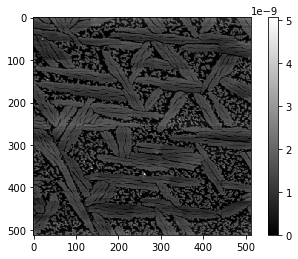

In [4]:
I2 = bckgrnd_correc_sq(I1, 50.0)

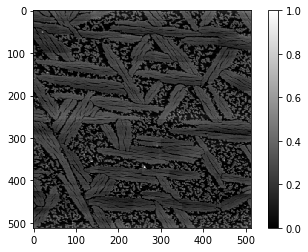

In [5]:
I3 = convert_to_grayscale(I2)

In [22]:
type(I1)

numpy.ndarray

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import segmentation
from sklearn import cluster
from ImagePreprocessing import convert_to_grayscale

def seg_random_walker(image, marker_threshold):
    
    """Image segmentation using skimage random walker segmentation algorithm. The image """
    
    markers = np.zeros(image.shape)
    markers[image < marker_threshold] = 1 # ordered regions
    markers[image > marker_threshold] = 2 # disordered regions
    
    segmented = segmentation.random_walker(image, markers)
    
    plt.figure()
    seg_image = convert_to_grayscale(segmented)
    plt.title('Segmented Image')

    plt.figure()
    plt.imshow(image, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.title('Original Image')
    plt.figure()
    plt.imshow(markers, cmap='plasma', interpolation='nearest')
    plt.colorbar()
    plt.title('Markers')

       
    return seg_image
    


C:\Users\sarth\Anaconda2\lib\site-packages\skimage\segmentation\random_walker_segmentation.py:358: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  warn('Random walker only segments unlabeled areas, where '


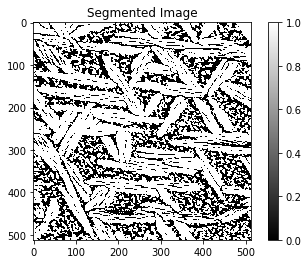

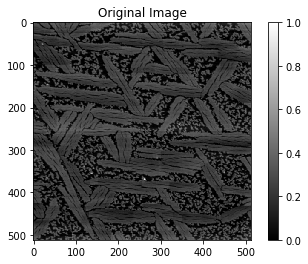

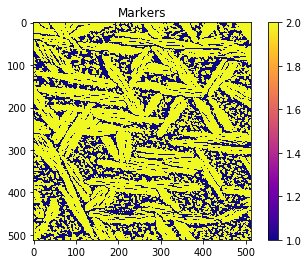

In [7]:
trial = seg_random_walker(I3, 0.15)

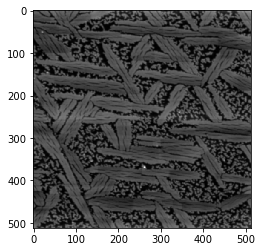

In [88]:
r = filters.gaussian(I3, sigma = 1, mode= 'reflect')
plt.imshow(r)

In [15]:
trial

array([[ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.]])

In [47]:
k_means = cluster.KMeans(n_clusters=2).fit(trial)

In [51]:
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

In [56]:
trial_compressed = np.choose(labels, values)

In [57]:
values.shape

(2L, 512L)

In [58]:
labels.shape

(512L,)

In [60]:
values

array([[ 0.26708075,  0.27329193,  0.2484472 , ...,  0.28571429,
         0.31055901,  0.31677019],
       [ 0.27635328,  0.26780627,  0.26495726, ...,  0.25356125,
         0.24216524,  0.25356125]])

In [27]:
q2 = np.reshape(q, (I3.shape[1], I3.shape[1]))

ValueError: total size of new array must be unchanged

In [32]:
kmeans.cluster_centers_

array([[ 0.27118644,  0.26553672,  0.26271186, ...,  0.25423729,
         0.24576271,  0.25706215],
       [ 0.27848101,  0.27848101,  0.25316456, ...,  0.28481013,
         0.30379747,  0.31012658]])

TypeError: Input must be a 2D array.

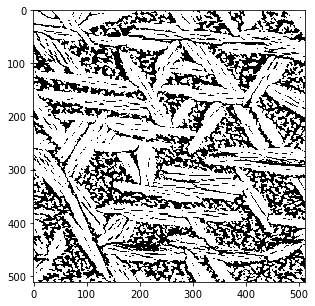

In [13]:
X = trial.reshape((-1, 1))  # We need an (n_sample, n_feature) array
n_clusters = 2
k_means = cluster.KMeans(n_clusters = 3)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

# create an array from labels and values
face_compressed = np.choose(labels, values)
#np.reshape(face_compressed,)
face_compressed.shape = trial.shape

vmin = trial.min()
vmax = trial.max()



# original face
#plt.figure(1)#, figsize=(3, 2.2))
#plt.imshow(trial, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)


plt.figure(figsize=(5, 5))
plt.imshow(trial, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(labels == l, contours=1,colors=[plt.cm.spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()
# compressed face
#plt.figure(2)#, figsize=(3, 2.2))
#plt.imshow(face_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

In [19]:
values.shape

(2L,)

In [22]:
values

array([ 1.,  0.])

In [196]:
img = trial

w = img.shape[1]
h = img.shape[0]

# spatial dimensions
X = np.tile(np.arange(w), (h, 1))
Y = np.tile(np.arange(h), (w, 1)).T

# create feature set
X = X.flatten()
Y = Y.flatten()
I = img.flatten()
S = np.concatenate((I[:, np.newaxis], X[:, np.newaxis], Y[:, np.newaxis]),
                   axis=1)

# normalize features
mean = np.mean(S, axis=0)
std = np.std(S, axis=0, ddof=1)
S = (S - mean) / std

# clustering
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(S)

# extract means of each cluster & clustered intensities population
clusters_means = k_means.cluster_centers_.squeeze()
clusters = k_means.labels_

# get clustered image from clustered intensities
img_clustered = np.choose(clusters, [0.0, 1.0])
img_clustered.shape = img.shape

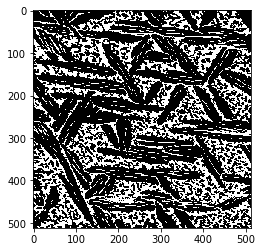

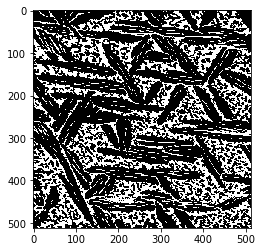

In [165]:
plt.figure()
plt.imshow(img_clustered)

plt.figure()
plt.imshow(img)

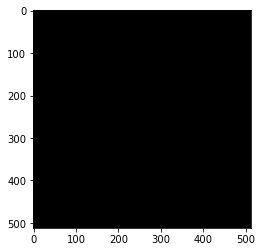

In [116]:
X = img.reshape((-1, 1))
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(X)

# extract means of each cluster & clustered population
clusters_means = k_means.cluster_centers_.squeeze()
X_clustered = k_means.labels_
print('# of Observations:', X.shape)
print('Clusters Means:', clusters_means)

# save clustered image
X_clustered.shape = img.shape

('# of Observations:', (262144L, 1L))
('Clusters Means:', array([ 0.,  1.]))


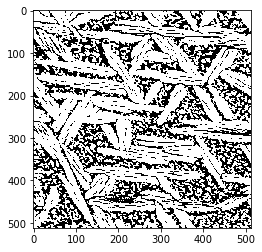

In [121]:
plt.figure()
plt.imshow(img_clustered)


In [120]:
img_clustered = np.choose(X_clustered, [512, 0])

In [123]:
from skimage.filters import threshold_otsu
img_clustered.shape = img.shape


# otsu thresholding of the binary image obtained
threshold = threshold_otsu(img_clustered)
img_thresholded = img_clustered > threshold

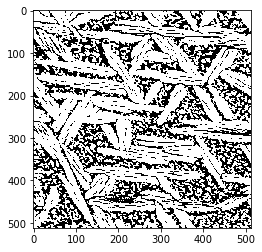

In [124]:
plt.imshow(img_thresholded)

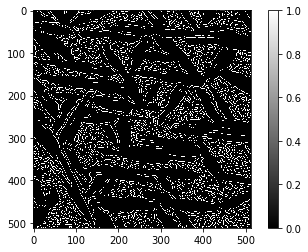

In [131]:
I_canny = feature.canny(I3, sigma = 2.0, low_threshold = 0.15)
plt.imshow(I_canny, cmap = 'gray')
plt.colorbar()

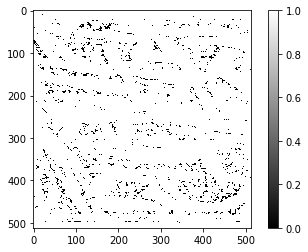

In [195]:
from scipy import ndimage as ndi

fill_holes = ndi.binary_fill_holes(I3, structure=np.ones((10,100))).astype(int)

plt.imshow(fill_holes, cmap = 'gray')
plt.colorbar()

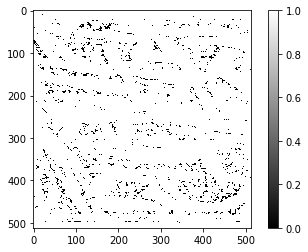

In [144]:
cleaned = morphology.remove_small_objects(fill_holes, 21)

plt.imshow(fill_holes, cmap = 'gray')
plt.colorbar()

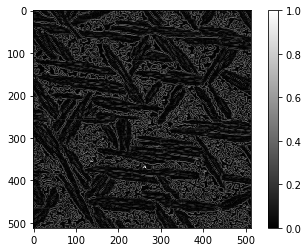

In [159]:
region_based = filters.sobel(I2)

region_based = convert_to_grayscale(region_based)





In [171]:
ret, thresh = cv2.threshold(I3, 88, 255, cv2.THRESH_BINARY)

thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
derp, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,
                                             cv2.CHAIN_APPROX_SIMPLE)
cnts = max(contours, key=cv2.contourArea)
rect = cv2.minAreaRect(cnts)
box = cv2.boxPoints(rect)
box = np.int0(box)
hello = cv2.drawContours(I3, [box], 0, (0, 0, 255), 2)
plt.figure()
plt.plot(133), plt.imshow(hello)
plt.figure()
plt.scatter(box[:, 0], box[:, 1], c='yellow')

error: ..\..\..\modules\imgproc\src\thresh.cpp:782: error: (-210)  in function cv::threshold


(<matplotlib.text.Text at 0x29869710>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

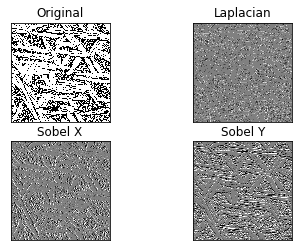

In [173]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = trial

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

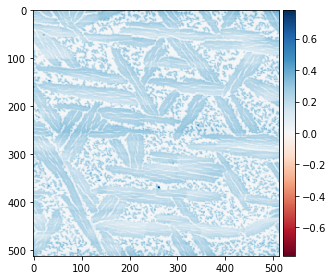

In [190]:
filt_real, filt_imag = filters.gabor(I3, frequency=0.85)
plt.figure()            
io.imshow(filt_real)    
io.show()      

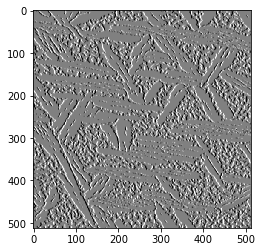

In [197]:
plt.imshow(sobelx,cmap = 'gray')

In [34]:
import scipy as sp
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

face = trial

# Resize it to 10% of the original size to speed up the processing
face = sp.misc.imresize(face, 0.40) / 255.

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(face)

# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

# Apply spectral clustering (this step goes much faster if you have pyamg
# installed)
N_REGIONS = 150

Spectral clustering: kmeans, 593.75s
Spectral clustering: discretize, 502.66s


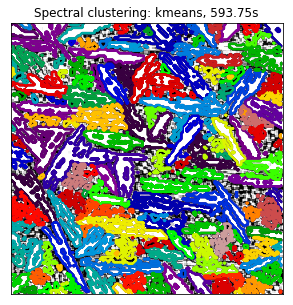

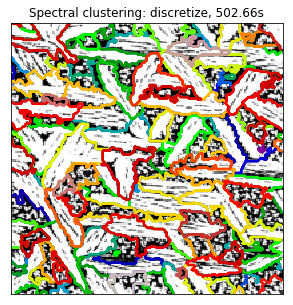

In [36]:
import time

for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels, random_state=1)
    t1 = time.time()
    labels = labels.reshape(face.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(face, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1,
                    colors=[plt.cm.spectral(l / float(N_REGIONS))])
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
    print(title)
    plt.title(title)
plt.show()

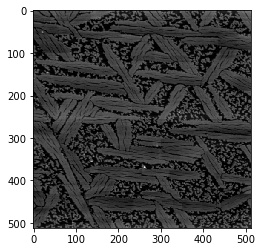

In [31]:
plt.imshow(I3)

In [41]:
from scipy.spatial import ConvexHull
hull = ConvexHull(trial(-1,1))

TypeError: 'numpy.ndarray' object is not callable